In [1]:
import numpy as np

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import seml.database as db_utils
from pathlib import Path

import torch

from itertools import product

from statsmodels.stats.proportion import proportion_confint

import pandas as pd

import os

import sys
sys.path.append('..')
from utils import load_results

In [2]:
collection = 'invariance_eval_inverse_parallel'


jk_config = {
    'username': 'schuchaj',
    'password': 'coolpassword',
    'host': 'hostofyourdatabase',
    'port': 27017,
    'db_name': 'nameofyourdatabase'
}

col = db_utils.get_collection(collection, mongodb_config=jk_config)

In [3]:
def get_experiments(col, restrictions={}):
    
    restrictions['status'] = 'COMPLETED'

    if col.count_documents(restrictions) == 0:
        raise ValueError('No matches!')

    exps = col.find(restrictions)
    
    return exps

In [4]:
def get_certificates(raw_results_file):
    raw_results = torch.load(raw_results_file)

    norm_clean = list(raw_results.keys())[1][0]
    deltas = np.array([k[1] for k in list(raw_results.keys())[1:]])

    certs_cohen = []
    certs_ours = []
    
    for delta in deltas:
        certs_cohen.append(raw_results[(norm_clean, delta)]['inverse_cohen'])
        certs_ours.append(raw_results[(norm_clean, delta)]['inverse_ours'][0, 0])

    certs_cohen = np.array(certs_cohen)
    certs_ours = np.array(certs_ours)

    return deltas, certs_cohen, certs_ours

In [5]:
def generate_exp_result_dict(exp):

    result_dict = {}
    
    result_dict['std'] = exp['config']['sigma']
    result_dict['norm_clean'] = exp['config']['norms_clean_params']['values'][0]

    result_dict['raw_results_file'] = exp['result']['save_file']

    deltas, pmins_cohen, pmins_ours = get_certificates(result_dict['raw_results_file'])

    result_dict['deltas'] = deltas
    result_dict['pmins_cohen'] = pmins_cohen
    result_dict['pmins_ours'] = pmins_ours

    return result_dict

In [6]:
experiments = get_experiments(col, restrictions={
    'config.n_samples_clean': 10000,
    'config.n_samples_pert': 10000
})
results = load_results(
            generate_exp_result_dict,
            experiments,
            results_file='/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/raw_data',
            #overwrite=True
            )

In [7]:
results

,std,norm_clean,raw_results_file,deltas,pmins_cohen,pmins_ours
0,0.01,0.01,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.8413447460685429, 0.9772498680518208, ...","[0.5415579702900893, 0.8419633456150311, 0.978..."
1,0.01,0.02,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.8413447460685429, 0.9772498680518208, ...","[0.5406601135941298, 0.857275266890054, 0.9810..."
2,0.01,0.03,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.8413447460685429, 0.9772498680518208, ...","[0.5387644627904201, 0.8643353711394046, 0.983..."
3,0.01,0.04,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.8413447460685429, 0.9772498680518208, ...","[0.5396624323388781, 0.8636587928720502, 0.983..."
4,0.01,0.05,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.8413447460685429, 0.9772498680518208, ...","[0.5382655677287591, 0.8644320177899364, 0.982..."
...,...,...,...,...,...,...
347,0.30,0.75,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.5132956138170921, 0.5265764643003651, ...","[0.5374673013312103, 0.5492374455069089, 0.558..."
348,0.40,0.75,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.509972518195238, 0.5199388058383725, 0...","[0.5393631150941538, 0.5452485969114249, 0.552..."
349,0.50,0.75,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.5079783137169019, 0.5159534368528308, ...","[0.8705169570380864, 0.5439519933223034, 0.545..."
350,0.75,0.75,/nfs/staff-ssd/schuchaj/pointcloud_invariance_...,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.5, 0.5053190728027284, 0.51063720009057, 0....","[0.8385660723501673, 0.539762203434087, 0.5385..."


In [20]:
def plot(results, std, norms_clean, cmap_values=None, xlim=None, legend_location=None, stride=1, legend_fontsize=7):
    sns.set_theme()
    fig, ax = plt.subplots(1, 1)

    results = results.loc[(results['std'] == std) & (results['norm_clean'].isin(norms_clean))]
    results = results.drop(['std', 'raw_results_file'], axis=1)
    results = results.reset_index(drop=True)
    
    norm_clean_max = 0

    # plot baseline
    deltas_cohen = results['deltas'][0]
    pmins_cohen = results['pmins_cohen'][0]

    print(deltas_cohen[(pmins_cohen >= 0.7).argmax()])

    pal = sns.color_palette('colorblind', 2)

    if xlim is not None:
        xlim_mask = (deltas_cohen <= xlim)
        deltas_cohen = deltas_cohen[xlim_mask]
        pmins_cohen = pmins_cohen[xlim_mask]
        if deltas_cohen.max() > norm_clean_max:
            norm_clean_max = deltas_cohen.max()

    # hack to get normal width line in legend
    plt.plot(deltas_cohen, pmins_cohen, zorder=3, clip_on=False, color=pal[1], linewidth=3)
    line_baseline, = plt.plot(deltas_cohen, pmins_cohen, zorder=3, clip_on=False, color=pal[1], label='Baseline')
    
    # plot ours

    norms_clean = results['norm_clean'].values
    norms_clean = norms_clean
    
    sequential_colormap = sns.color_palette('Blues_r', as_cmap=True)
    if cmap_values is None:
        cmap_values = np.linspace(0.2, 0.65, len(norms_clean))

    lines_ours = []

    for norm_clean, cmap_value in list(zip(norms_clean, cmap_values))[::-1]:
        deltas, pmins = results.loc[results['norm_clean'] == norm_clean][['deltas', 'pmins_ours']].iloc[0].values.copy()
        pmins[0] = 0.5

        print(deltas[(pmins >= 0.7).argmax()])

        deltas, pmins = deltas[::stride], pmins[::stride]

        if xlim is not None:
            xlim_mask = (deltas <= xlim)
            deltas = deltas[xlim_mask]
            pmins = pmins[xlim_mask]
            if deltas.max() > norm_clean_max:
                norm_clean_max = deltas.max()
    
        line_ours, = plt.plot(deltas, pmins, zorder=3, clip_on=False, color=sequential_colormap(cmap_value),
                 label=f'$||X||_2$ = {norm_clean}')

    
        lines_ours.append(line_ours)


    plt.ylim(0.5, 1)

    if xlim:
        plt.xlim(0, norm_clean_max)

    plt.xlabel('$||\Delta||$')
    plt.ylabel('$p_\mathrm{min}$')

    if legend_location is None:
        legend_location = 'upper right'
    plt.legend([line_baseline, line_ours][::-1], [r'$\mathit{SO}(2)$ Orbit', r'$\mathit{SO}(2)$ Tight'][::-1], loc=legend_location, fontsize=legend_fontsize)

    ax2 = ax.twinx()
    ax2.get_yaxis().set_visible(False)
    ax2.legend(lines_ours, [f'||X||={x}' for x in norms_clean[::-1]], loc='lower right',
               ncol=1, title_fontsize=5,
               handlelength=1.15, fontsize=legend_fontsize)

0.06
0.06
0.07
0.08
0.1


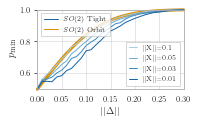

In [9]:
plot(results, 0.1, [0.01, 0.03, 0.05, 0.1], xlim=0.3, legend_location='upper left')
plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-1', format='pgf')

0.08
0.09
0.09
0.12
0.14


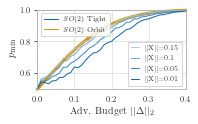

In [21]:
plot(results, 0.15, [0.01, 0.05, 0.1, 0.15], xlim=0.4, legend_location='upper left')
plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-15', format='pgf')

0.11
0.1
0.14
0.17
0.2


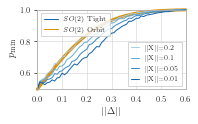

In [11]:
plot(results, 0.2, [0.01, 0.05, 0.1, 0.2], xlim=0.6, legend_location='upper left')
plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-2', format='pgf')

0.14
0.13
0.18
0.21
0.26


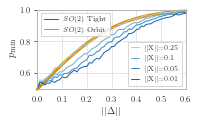

In [12]:
plot(results, 0.25, [0.01, 0.05, 0.1, 0.25], xlim=0.6, legend_location='upper left')
plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-25', format='pgf', preview=None, close_fig=False, pad={'tight': 0.1})

0.27
0.27
0.33
0.43
0.51


/tmp/ipykernel_1515844/2933511586.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-5.svg', format='svg', pad={'tight': 0.1})


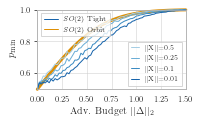

In [22]:
plot(results, 0.5, [0.01, 0.1, 0.25, 0.5], xlim=1.5, legend_location='upper left', stride=2)
plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-5', format='pgf')

plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_0-5.svg', format='svg', pad={'tight': 0.1})

0.53
0.51
0.6
0.78
1.01


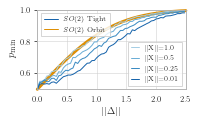

In [14]:
plot(results, 1.0, [0.01, 0.25, 0.5, 1.0], xlim=2.5, legend_location='upper left', stride=4)
plt.savefig('/nfs/staff-ssd/schuchaj/pointcloud_invariance_plots/neurips_camera_ready/inverse/parallel/final_plots/inverse_parallel_1', format='pgf')